<a href="https://colab.research.google.com/github/MikeyTV3124/sales-predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 4
Michael Vera


## Loading Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/sales_predictions.csv')

## Data Cleaning

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


How many rows and columns

In [5]:
df.shape

(8523, 12)

*   There are 8523 Rows and 12 Columns




Checking Data Types

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

  * Outlet Size is missing many values and doesn't add great information for predictions. We'll remove it to clean the data.
  * All other columns have complete information (except Item_Weight which we'll fix later) which can be useful in one manner or another.

In [7]:
df = df.drop(columns=['Outlet_Size'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


  * Item Weight is also missing values. We'll add in an average weight to all missing values to fill in information.

In [8]:
mean_itemweight = df['Item_Weight'].mean()

df['Item_Weight'].fillna(value = mean_itemweight, inplace = True)

Double check that no missing values are in the data set.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


Check for duplicates.

In [10]:
df.duplicated().sum()

0

Examine the number of unique values in columns.

In [11]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Check each unique identifier for spelling and syntax errors.

In [12]:
#Check for spelling and syntax errors
#df['Item_Identifier'].value_counts() - Checked out
#df['Item_Weight'].value_counts() - Checked out
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

LF, reg, and low fat need to be consolidated.

In [13]:
#Fix LF, reg, and low fat 
df.replace(['LF', 'reg', 'low fat'], ['Low Fat', 'Regular', 'Low Fat'], inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
#Contine checking for spelling and syntax errors
#df['Item_Visibility'].value_counts() - Checked Out
#df['Item_Type'].value_counts() - Checked Out
#df['Item_MRP'].value_counts() - Checked Out
#df['Outlet_Identifier'].value_counts() - Checked Out
#df['Outlet_Establishment_Year'].value_counts() - Checked Out
#df['Outlet_Location_Type'].value_counts() - Checked Out
#df['Outlet_Type'].value_counts() - Checked Out
#df['Item_Outlet_Sales'].value_counts() - Checked Out

Check for missing values.

In [16]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
# show summary stats for all numeric columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals


In [26]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster']);

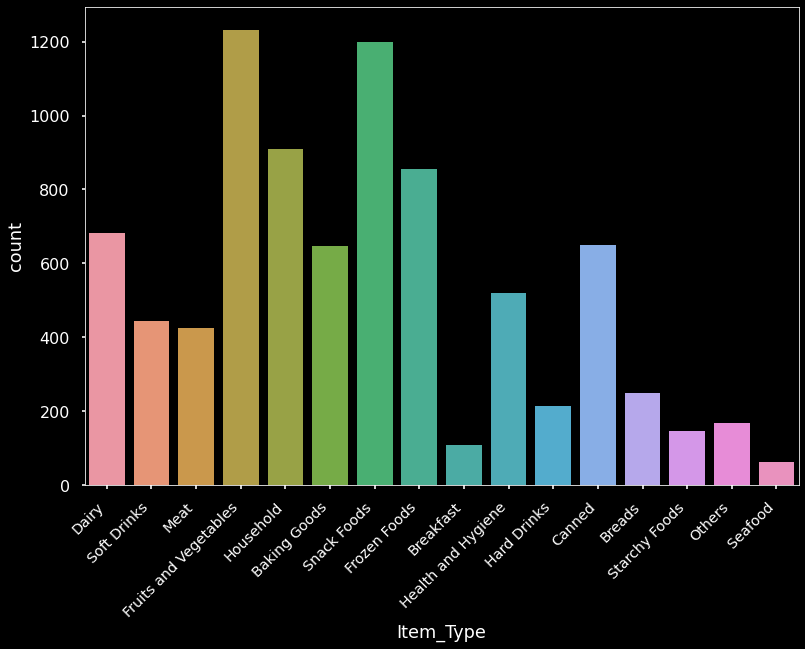

In [31]:
df['Item_Type'].value_counts()

ax = sns.countplot(
    data = df, 
    x = 'Item_Type'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

Here we can see that the least amount of our products are: Breakfast, Hard Drinks, Breads, Starchy Foods, Seafood, and Others.

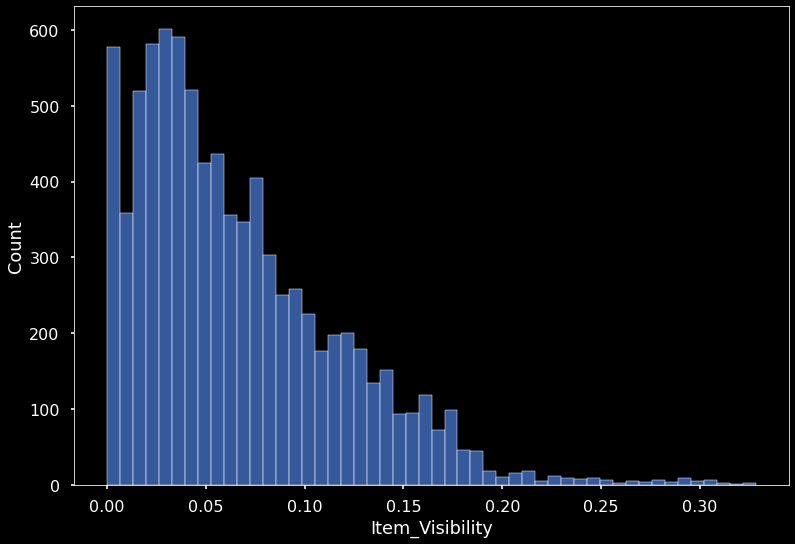

In [32]:
ax = sns.histplot(data = df, x = 'Item_Visibility')

Item Visibility is incredibly low for the majority of our products. 
Projects should be created to raise visibility.

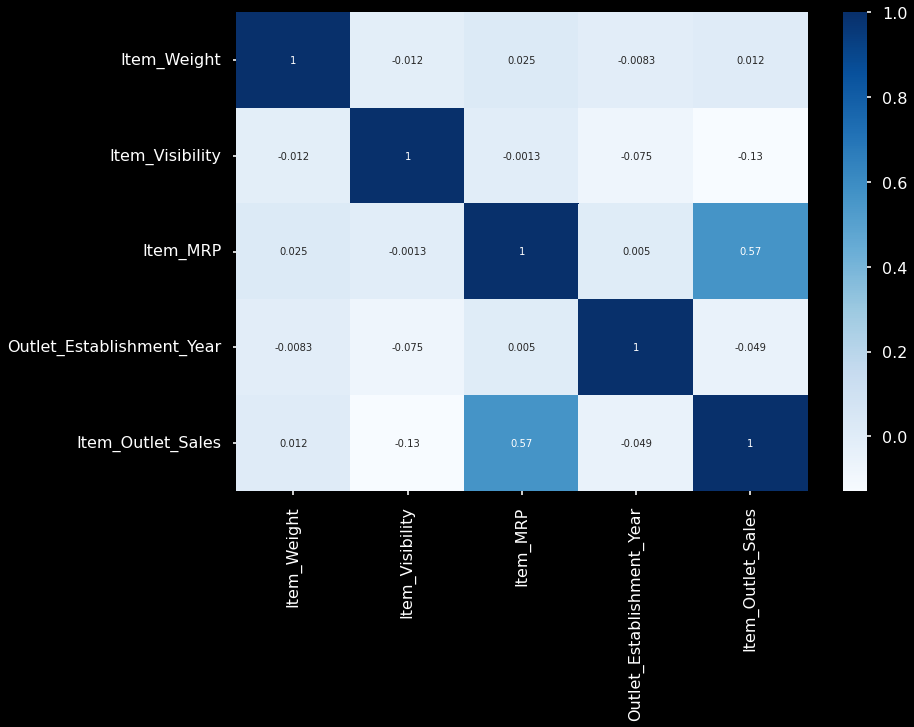

In [33]:
sns.heatmap(df.corr(),annot=True,cmap='Blues');

We can see a relatively strong correlation between Item MRP and Item Outlet Sales. All other correlations are negligible.

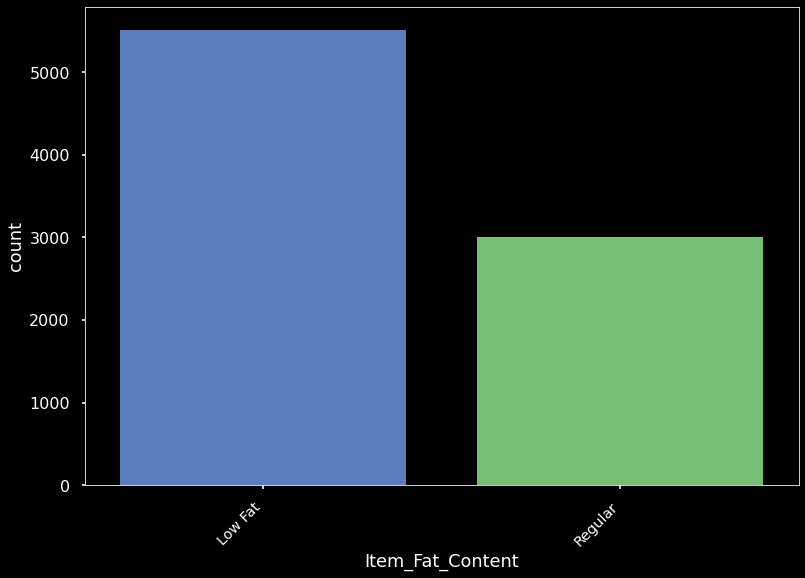

In [35]:
df['Item_Fat_Content'].value_counts()

ax = sns.countplot(
    data = df, 
    x = 'Item_Fat_Content'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

Here we can see our Low Fat products are 50% more than our Regular products.

## Explanatory Visuals

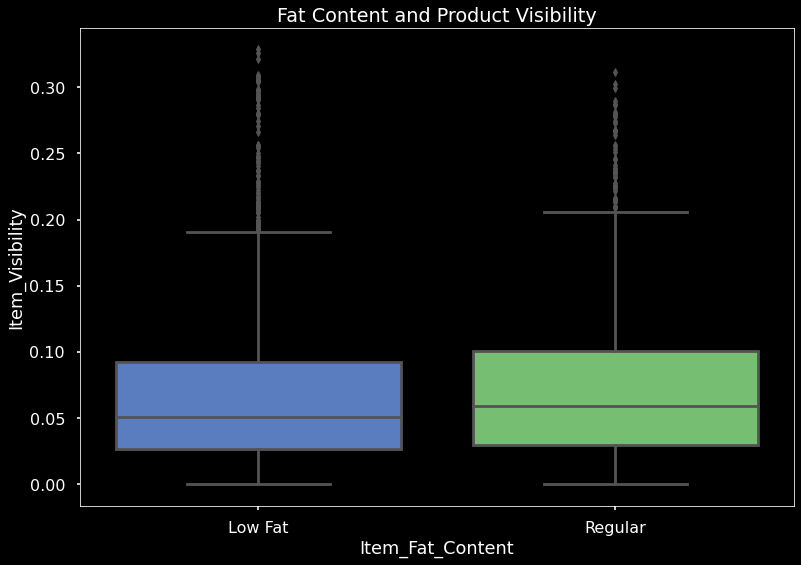

In [47]:
sns.boxplot(x='Item_Fat_Content', y='Item_Visibility', data=df).set(title='Fat Content and Product Visibility');

The analysis provided here shows: 

*   In previous analysis that our Low Fat products accounted for over 50% more products in our catalog. 
*   We can see that the products that populate the majority of our catalog have very low visibility in our stores.

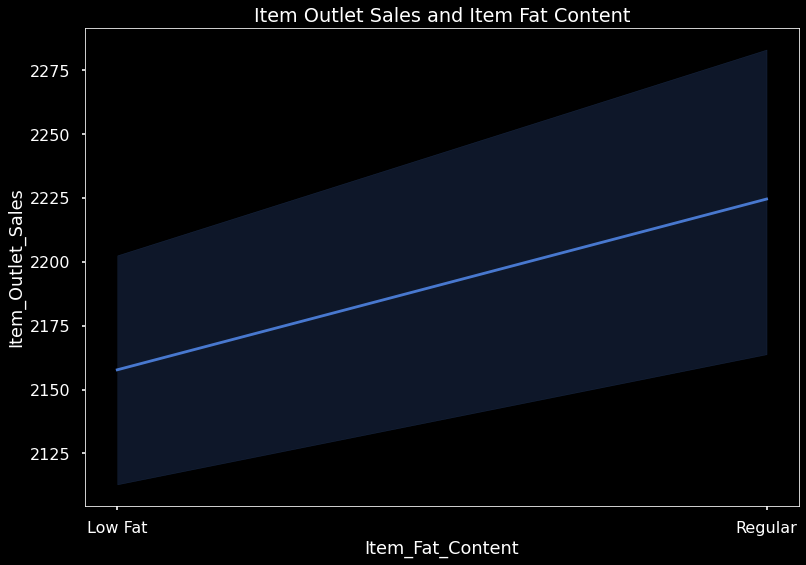

In [54]:
#Gather information using only the employees who left the company.
#attritionSatisfaction = df.query("Item_Fat_Content == 'Low Fat'")

#Compare Job Level and Job Satisfaction of employees who left the company.
sns.lineplot(data=df, x="Item_Fat_Content", y="Item_Outlet_Sales").set(title='Item Outlet Sales and Item Fat Content');

The analysis provided here shows: 

*   In previous analysis that our Low Fat products accounted for over 50% more products in our catalog. 
*   We can see that Regular Fat products account for a much higher percentage of sales compared to Low Fat
*   Projects should be created to broaden our catalog of Regular Fat products as this analysis shows that Regular Fat products sell better.